In [1]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv(
    r"/Users/tarrantcarter/Dropbox/Data Science/Thinkful/Thinkful Data Science Projects/Unsupervised_Learning_Capstone/sales_data_sample.csv",
    encoding="unicode_escape",
)

<IPython.core.display.Javascript object>

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

<IPython.core.display.Javascript object>

In [7]:
# df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

<IPython.core.display.Javascript object>

In [8]:
# drop columns that aren't useful
df2 = df.drop(
    [
        "ORDERNUMBER",
        "STATUS",
        "PHONE",
        "ADDRESSLINE1",
        "ADDRESSLINE2",
        "CITY",
        "POSTALCODE",
        "CONTACTLASTNAME",
        "CONTACTFIRSTNAME",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [9]:
# functiom that displays the percentage of missing values from each column
def missingness_summary(df, print_log=True, sort="descending"):
    percentage_null = df.isnull().sum() * 100 / df.isnull().count()
    pd.set_option("display.max_rows", None)
    if sort.lower() == "ascending":
        percentage_null = percentage_null.sort_values(ascending=True)
    elif sort.lower() == "descending":
        percentage_null = percentage_null.sort_values(ascending=False)
    if print_log:
        print(percentage_null)

    return pd.Series(percentage_null)


missing = missingness_summary(df2)

STATE              52.639036
TERRITORY          38.044633
DEALSIZE            0.000000
COUNTRY             0.000000
CUSTOMERNAME        0.000000
PRODUCTCODE         0.000000
MSRP                0.000000
PRODUCTLINE         0.000000
YEAR_ID             0.000000
MONTH_ID            0.000000
QTR_ID              0.000000
ORDERDATE           0.000000
SALES               0.000000
ORDERLINENUMBER     0.000000
PRICEEACH           0.000000
QUANTITYORDERED     0.000000
dtype: float64


<IPython.core.display.Javascript object>

In [10]:
# drop state and territoy column
df3 = df2.drop(["STATE", "TERRITORY"], axis=1)
missing = missingness_summary(df3)

DEALSIZE           0.0
COUNTRY            0.0
CUSTOMERNAME       0.0
PRODUCTCODE        0.0
MSRP               0.0
PRODUCTLINE        0.0
YEAR_ID            0.0
MONTH_ID           0.0
QTR_ID             0.0
ORDERDATE          0.0
SALES              0.0
ORDERLINENUMBER    0.0
PRICEEACH          0.0
QUANTITYORDERED    0.0
dtype: float64


<IPython.core.display.Javascript object>

In [11]:
print("Number of Object Columns:", df3.select_dtypes(object).shape[1])
print("Number of Numeric Columns:", df3.select_dtypes(["integer", "float"]).shape[1])

Number of Object Columns: 6
Number of Numeric Columns: 8


<IPython.core.display.Javascript object>

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CUSTOMERNAME     2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


<IPython.core.display.Javascript object>

In [13]:
df3.describe()

QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER         SALES  \
count      2823.000000  2823.000000      2823.000000   2823.000000   
mean         35.092809    83.658544         6.466171   3553.889072   
std           9.741443    20.174277         4.225841   1841.865106   
min           6.000000    26.880000         1.000000    482.130000   
25%          27.000000    68.860000         3.000000   2203.430000   
50%          35.000000    95.700000         6.000000   3184.800000   
75%          43.000000   100.000000         9.000000   4508.000000   
max          97.000000   100.000000        18.000000  14082.800000   

            QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count  2823.000000  2823.000000  2823.00000  2823.000000  
mean      2.717676     7.092455  2003.81509   100.715551  
std       1.203878     3.656633     0.69967    40.187912  
min       1.000000     1.000000  2003.00000    33.000000  
25%       2.000000     4.000000  2003.00000    68.000000  
50%       3.000000     8.000000  2004.00000    99.000000  
75%       4.000000    11.000000  2004.00000   124.000000  
max       4.000000    12.000000  2005.00000   214.000000

<IPython.core.display.Javascript object>

In [14]:
# drop unuseful columne orderline and redudant column month_id
df4 = df3.drop(["ORDERLINENUMBER", "MONTH_ID"], axis=1)

<IPython.core.display.Javascript object>

In [15]:
df4.describe(include="O")

ORDERDATE   PRODUCTLINE PRODUCTCODE           CUSTOMERNAME  \
count              2823          2823        2823                   2823   
unique              252             7         109                     92   
top     11/14/2003 0:00  Classic Cars    S18_3232  Euro Shopping Channel   
freq                 38           967          52                    259   

       COUNTRY DEALSIZE  
count     2823     2823  
unique      19        3  
top        USA   Medium  
freq      1004     1384

<IPython.core.display.Javascript object>

In [16]:
df4.PRODUCTLINE.value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
df4.CUSTOMERNAME.value_counts()

Euro Shopping Channel                 259
Mini Gifts Distributors Ltd.          180
Australian Collectors, Co.             55
La Rochelle Gifts                      53
AV Stores, Co.                         51
Land of Toys Inc.                      49
Rovelli Gifts                          48
Muscle Machine Inc                     48
Souveniers And Things Co.              46
Anna's Decorations, Ltd                46
Dragon Souveniers, Ltd.                43
Reims Collectables                     41
Corporate Gift Ideas Co.               41
Saveley & Henriot, Co.                 41
The Sharp Gifts Warehouse              40
Salzburg Collectables                  40
L'ordine Souveniers                    39
Scandinavian Gift Ideas                38
Handji Gifts& Co                       36
Danish Wholesale Imports               36
Mini Creations Ltd.                    35
Technics Stores Inc.                   34
Online Diecast Creations Co.           34
Tokyo Collectables, Ltd           

<IPython.core.display.Javascript object>

In [18]:
!pip install prince

<IPython.core.display.Javascript object>

In [19]:
pip install gower

ERROR:root:Cannot parse: 1:4: pip install gower
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install gower


Note: you may need to restart the kernel to use updated packages.


In [20]:
import gower

dist_matrix = gower.gower_matrix(df4)

<IPython.core.display.Javascript object>

In [21]:
dist_matrix

array([[0.        , 0.29843915, 0.40626514, ..., 0.6346204 , 0.56530017,
        0.5978967 ],
       [0.29843915, 0.        , 0.30630118, ..., 0.67573357, 0.48908326,
        0.6340788 ],
       [0.40626514, 0.30630118, 0.        , ..., 0.5916546 , 0.6287178 ,
        0.59038395],
       ...,
       [0.6346204 , 0.67573357, 0.5916546 , ..., 0.        , 0.4048376 ,
        0.33506298],
       [0.56530017, 0.48908326, 0.6287178 , ..., 0.4048376 , 0.        ,
        0.3826562 ],
       [0.5978967 , 0.6340788 , 0.59038395, ..., 0.33506298, 0.3826562 ,
        0.        ]], dtype=float32)

<IPython.core.display.Javascript object>

In [22]:
pip install pyclustering

ERROR:root:Cannot parse: 1:4: pip install pyclustering
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install pyclustering


Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install prince

ERROR:root:Cannot parse: 1:4: pip install prince
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install prince


Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import prince

<IPython.core.display.Javascript object>

In [25]:
famd = prince.FAMD()
famd.fit(df4)
famd_coordinates = famd.transform(df4)
famd_coordinates.columns = ["0", "1"]

<IPython.core.display.Javascript object>

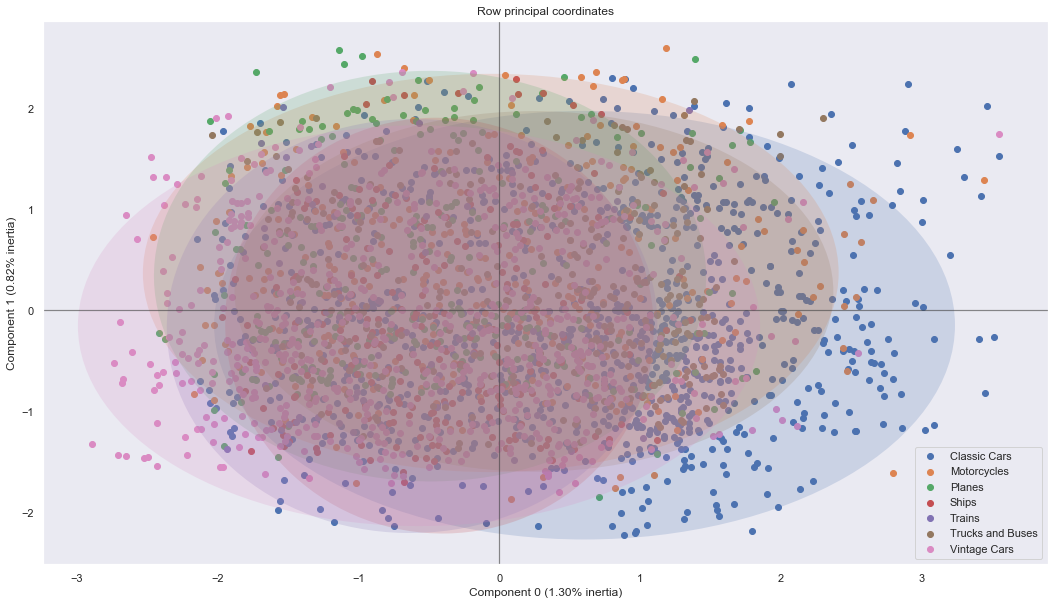

<IPython.core.display.Javascript object>

In [26]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["PRODUCTLINE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

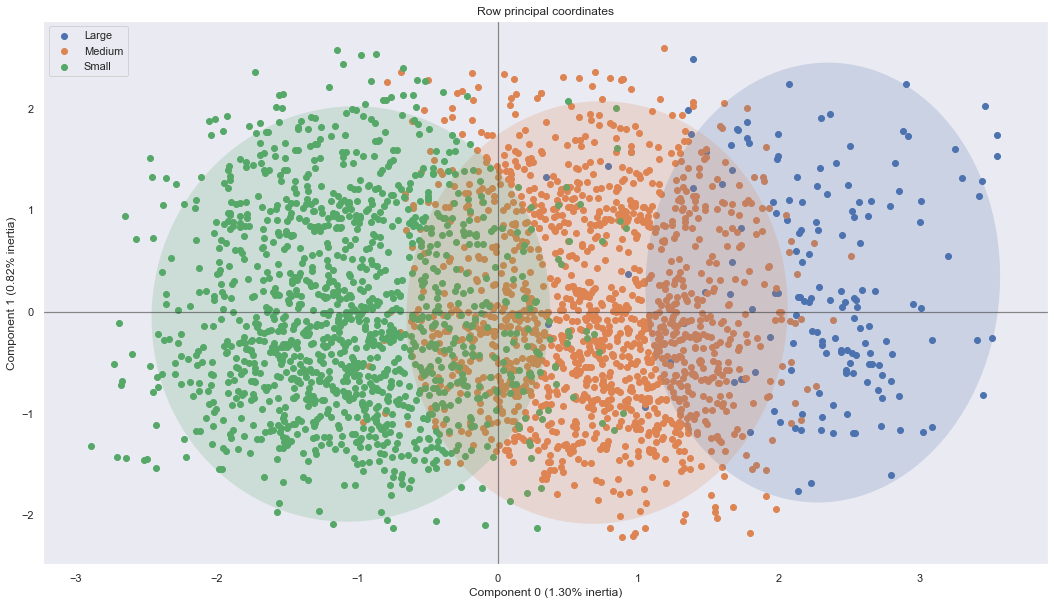

<IPython.core.display.Javascript object>

In [27]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["DEALSIZE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

In [28]:
# df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

<IPython.core.display.Javascript object>

In [31]:
inertia = []
silhouette = []
k_range = range(2, 31)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(famd_coordinates)
    inertia.append(k_means.inertia_)
    pred = k_means.predict(famd_coordinates)
    silhouette.append(silhouette_score(famd_coordinates, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

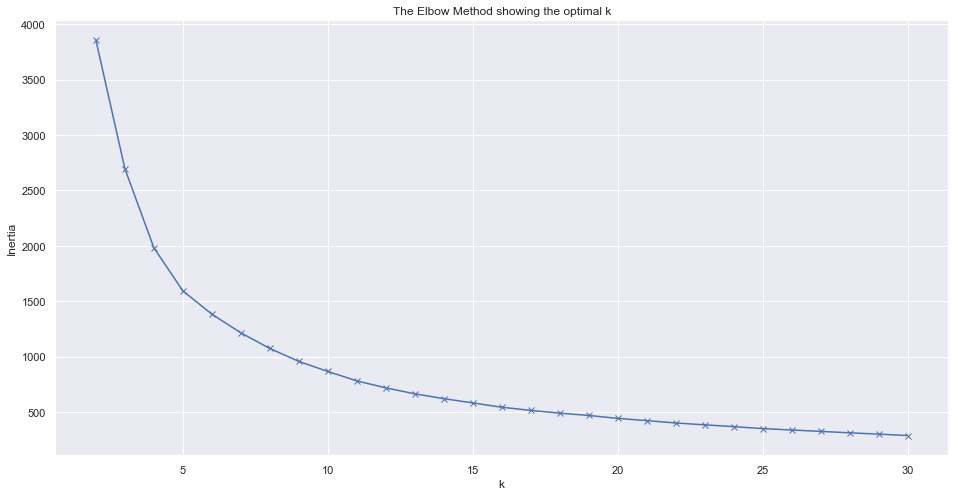

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("The Elbow Method showing the optimal k")
plt.show()

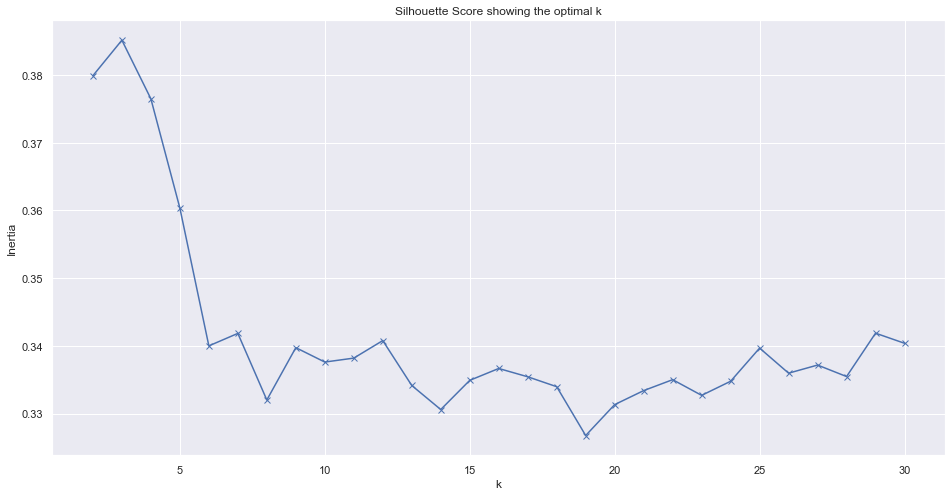

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, silhouette, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3)

kmeans.fit_predict(famd_coordinates)
y_kmeans = kmeans.predict(famd_coordinates)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=famd_coordinates.columns)
centers.style.background_gradient()
# centers_inverse = pd.DataFrame(scale.inverse_transform(centers), columns=X.columns)
# centers_inverse.style.background_gradient()

<IPython.core.display.Javascript object>

In [37]:
df4["K_Cluster"] = kmeans.fit_predict(famd_coordinates)
df4["K_Cluster"].value_counts()

1    1065
2    1011
0     747
Name: K_Cluster, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
X_famd = famd_coordinates.copy()
X_famd["K_means"] = y_kmeans

<IPython.core.display.Javascript object>

In [40]:
X_famd.head()

0         1  K_means
0 -0.228665  0.375390        1
1 -0.432053  0.400708        1
2  0.555900  0.180633        0
3  0.282052 -0.114520        0
4  0.802940 -0.863554        0

<IPython.core.display.Javascript object>

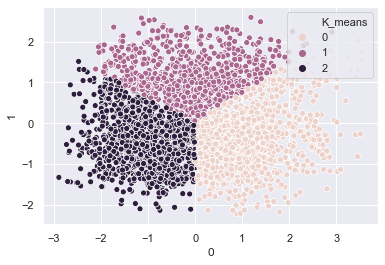

<IPython.core.display.Javascript object>

In [41]:
# plt.scatter(coordinates[:, 0], coordinates[:, 1], c=y_kmeans, s=50, cmap="viridis")
sns.scatterplot(x="0", y="1", hue="K_means", data=X_famd)

In [42]:
cluster = df4.groupby("K_Cluster").mean()
cluster.style.background_gradient()

<IPython.core.display.Javascript object>

In [43]:
df4["K_Cluster"].value_counts()

1    1065
2    1011
0     747
Name: K_Cluster, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
from sklearn.mixture import GaussianMixture

# inertia = []
silhouette = []
n_range = range(2, 31)

for n in n_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(famd_coordinates)
    # inertia.append(gmm.inertia_)
    pred = gmm.predict(famd_coordinates)
    silhouette.append(silhouette_score(famd_coordinates, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

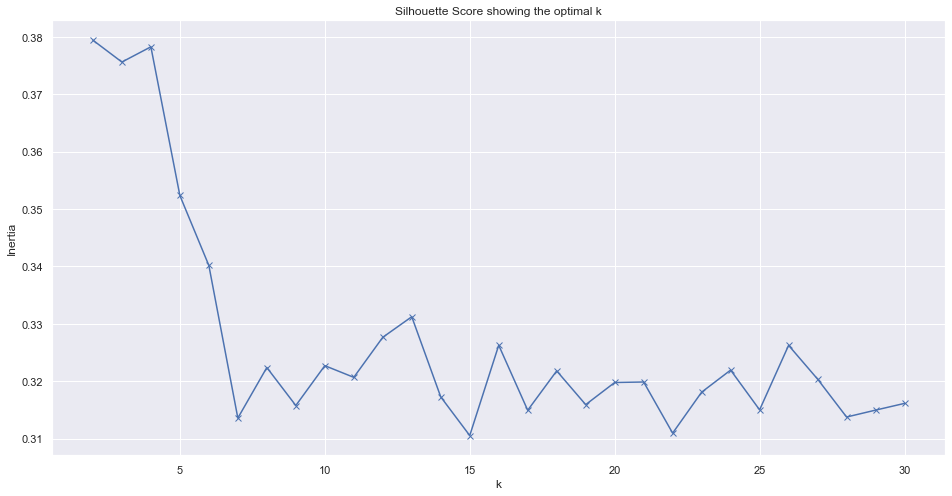

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, silhouette, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [56]:
from sklearn import metrics

covariance = ["full", "tied", "diag", "spherical"]

for c in covariance:
    gmm = GaussianMixture(n_components=4, covariance_type=c)
    clusters = gmm.fit_predict(famd_coordinates)
    print(
        f"The GMM model with {c} covariance has a silhouette score of {metrics.silhouette_score(famd_coordinates, clusters, metric='euclidean'):.4f}"
    )

The GMM model with full covariance has a silhouette score of 0.3223
The GMM model with tied covariance has a silhouette score of 0.3783
The GMM model with diag covariance has a silhouette score of 0.3784
The GMM model with spherical covariance has a silhouette score of 0.3790


<IPython.core.display.Javascript object>

In [57]:
gmm = GaussianMixture(n_components=4, covariance_type="spherical")

gmm.fit_predict(famd_coordinates)
y_gmm = gmm.predict(famd_coordinates)

centers = pd.DataFrame(gmm.means_, columns=famd_coordinates.columns)
centers.style.background_gradient()

<IPython.core.display.Javascript object>

In [58]:
X_famd = famd_coordinates.copy()
X_famd["GMM"] = y_gmm

<IPython.core.display.Javascript object>

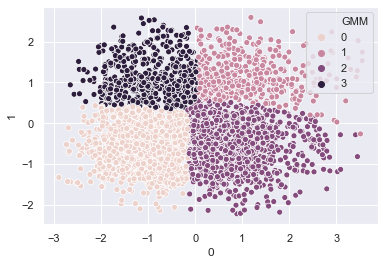

<IPython.core.display.Javascript object>

In [59]:
sns.scatterplot(x="0", y="1", hue="GMM", data=X_famd)

In [52]:
min_samples_list = range(2, 10)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

Number of clusters when min_samples=2 is: 1
Number of clusters when min_samples=3 is: 1
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1


<IPython.core.display.Javascript object>

In [53]:
for i in [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=0.01 is: 2741
Number of clusters when eps=0.1 is: 264
Number of clusters when eps=1 is: 1
Number of clusters when eps=2 is: 1
Number of clusters when eps=3 is: 1
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


<IPython.core.display.Javascript object>

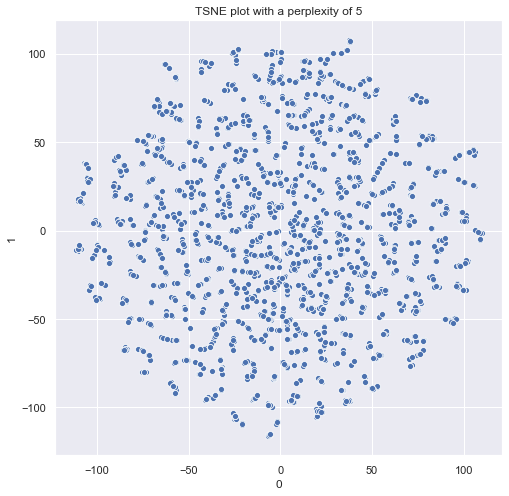

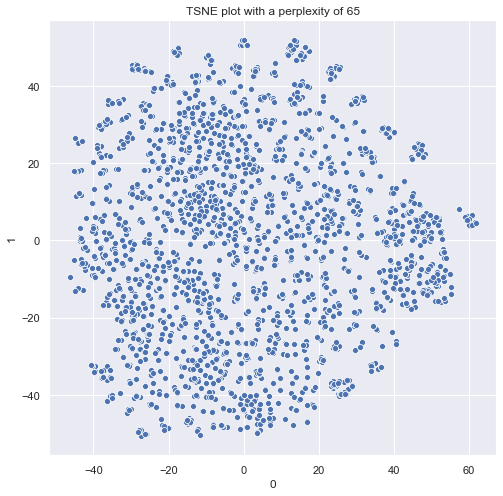

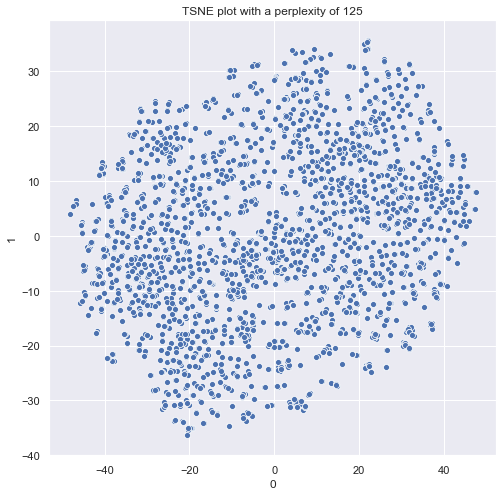

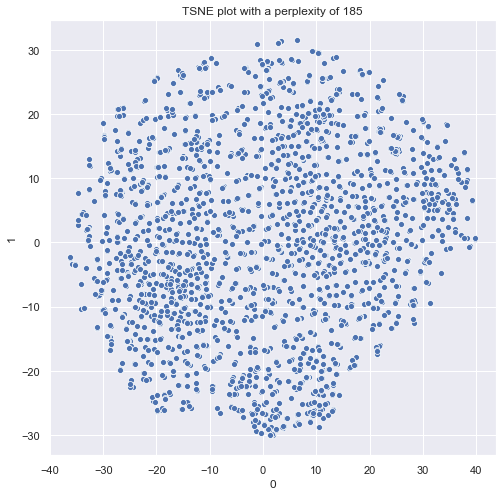

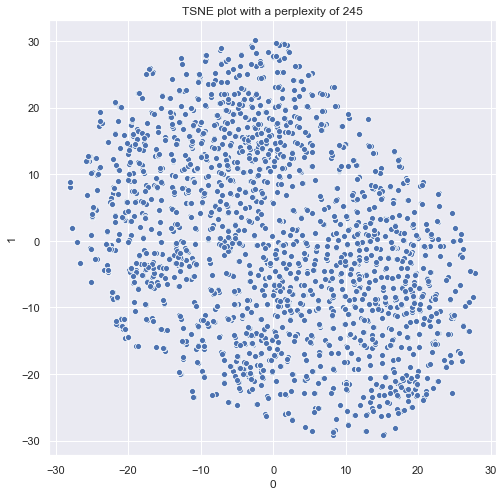

<IPython.core.display.Javascript object>

In [60]:
from sklearn.manifold import TSNE

for p in range(5, 300, 60):
    tsne = TSNE(perplexity=p, n_components=2, metric="precomputed")
    tsne_components = pd.DataFrame(tsne.fit_transform(dist_matrix), columns=["0", "1"])
    # tsne_components["Clusters"] = tsne.fit_transform(dist_matrix)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="0", y="1", data=tsne_components, ax=ax)
    plt.title(f"TSNE plot with a perplexity of {p}")
    plt.show()

In [61]:
pip install umap-learn

ERROR:root:Cannot parse: 1:4: pip install umap-learn
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


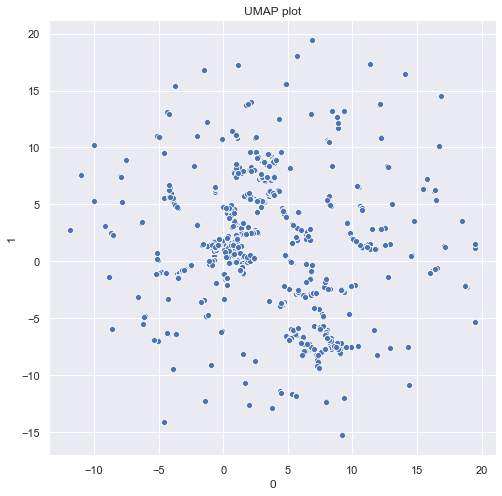

<IPython.core.display.Javascript object>

In [62]:
import umap

U = umap.UMAP(n_neighbors=5, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

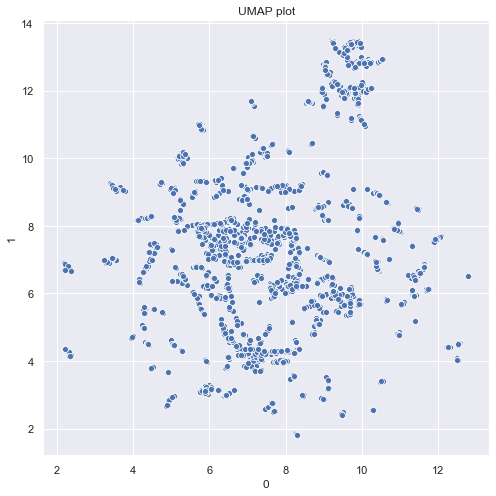

<IPython.core.display.Javascript object>

In [63]:
U = umap.UMAP(n_neighbors=25, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

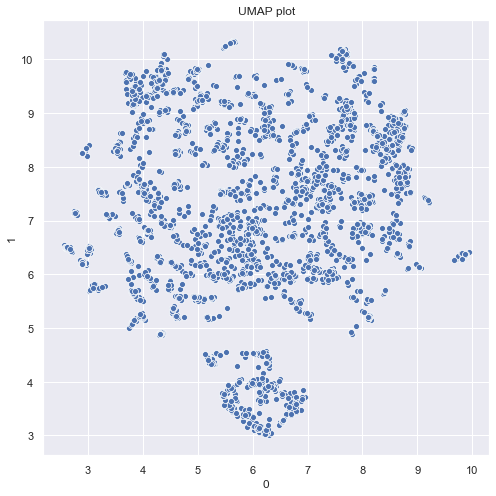

<IPython.core.display.Javascript object>

In [64]:
U = umap.UMAP(n_neighbors=100, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

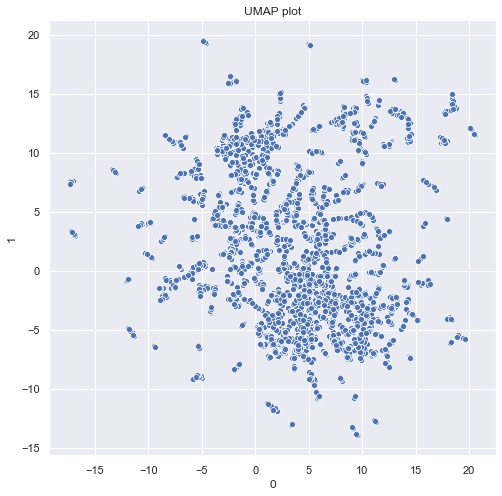

<IPython.core.display.Javascript object>

In [65]:
U = umap.UMAP(n_neighbors=5, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

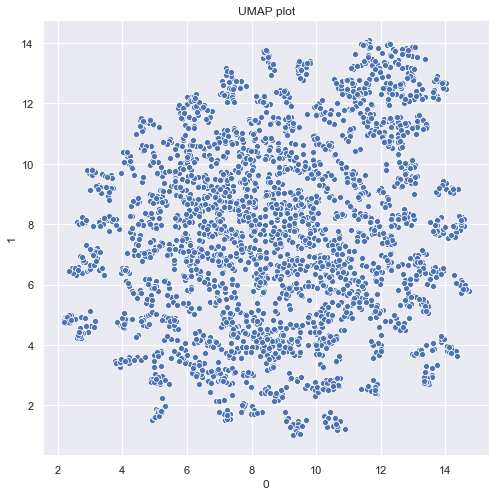

<IPython.core.display.Javascript object>

In [66]:
U = umap.UMAP(n_neighbors=25, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

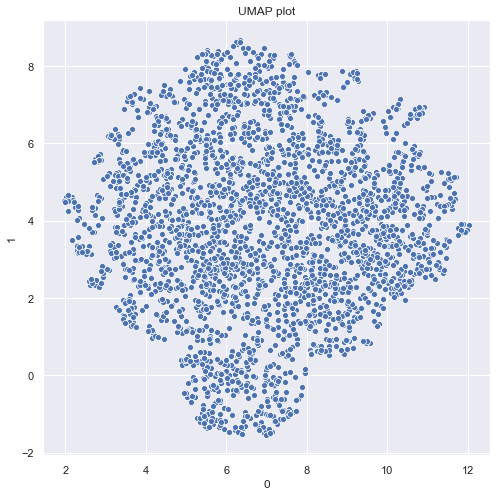

<IPython.core.display.Javascript object>

In [67]:
U = umap.UMAP(n_neighbors=100, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

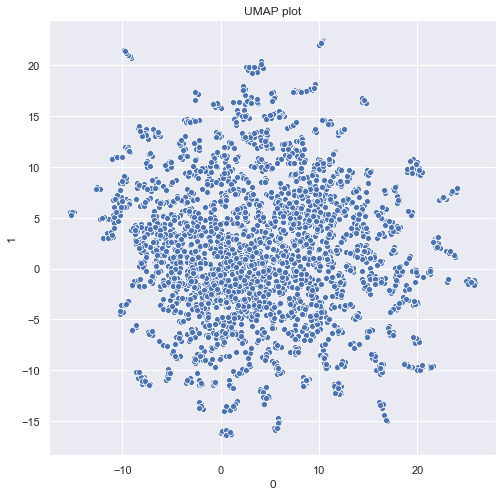

<IPython.core.display.Javascript object>

In [68]:
U = umap.UMAP(n_neighbors=5, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

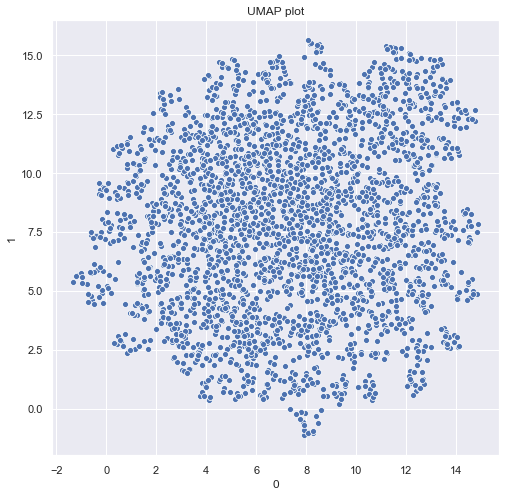

<IPython.core.display.Javascript object>

In [69]:
U = umap.UMAP(n_neighbors=25, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

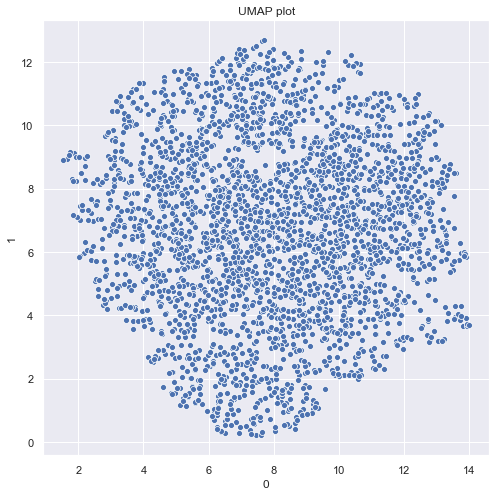

<IPython.core.display.Javascript object>

In [70]:
U = umap.UMAP(n_neighbors=100, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

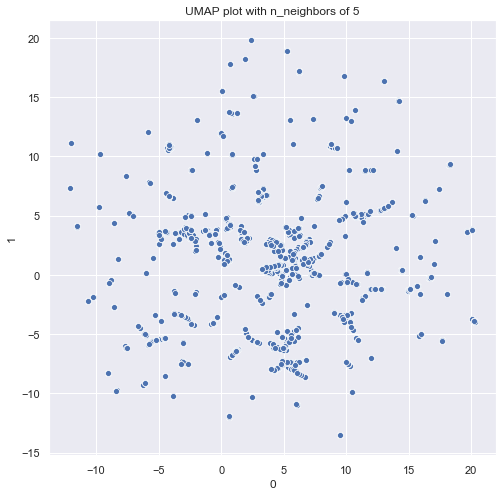

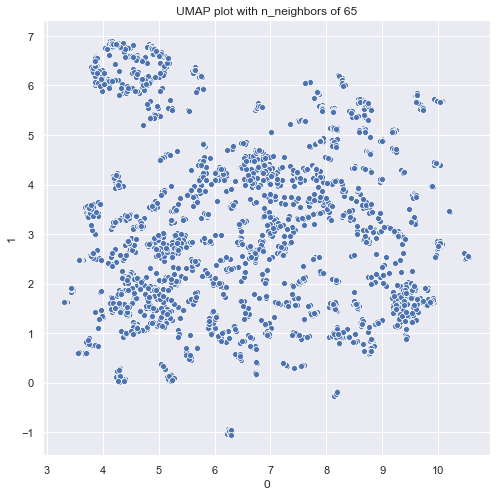

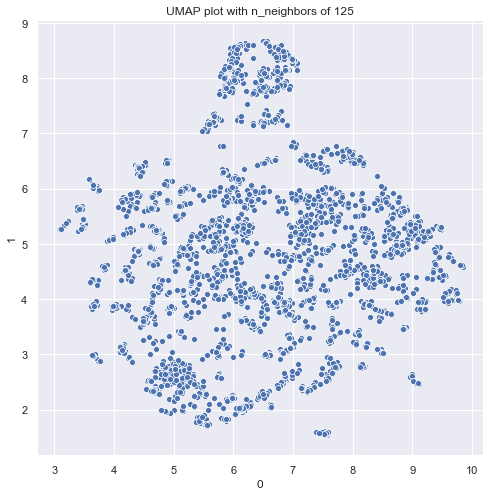

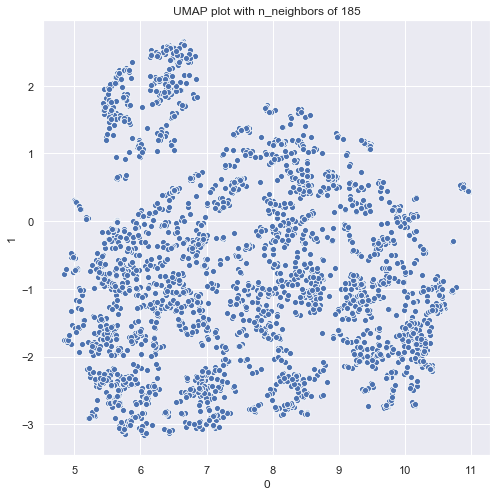

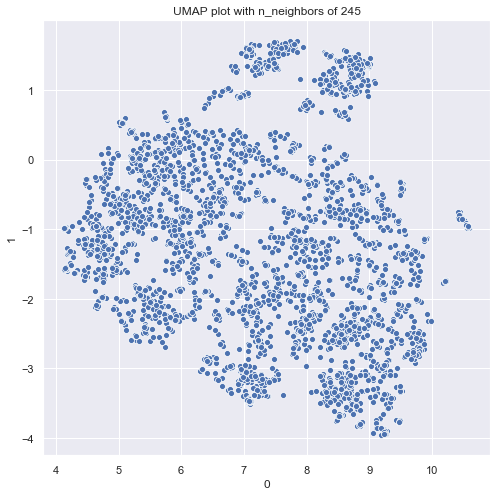

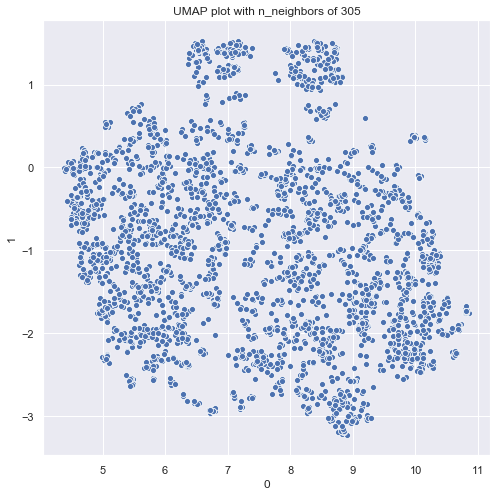

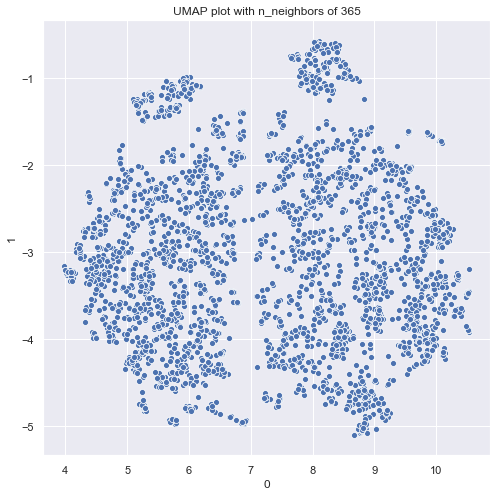

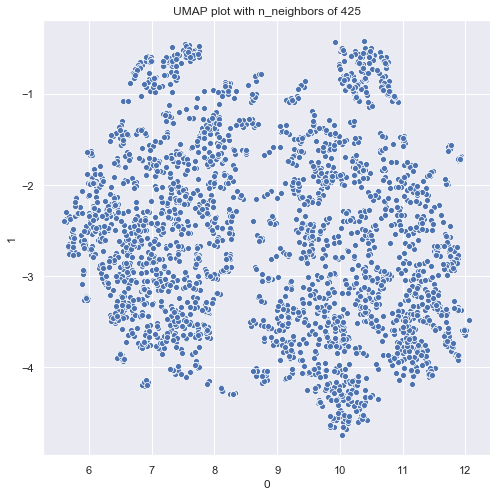

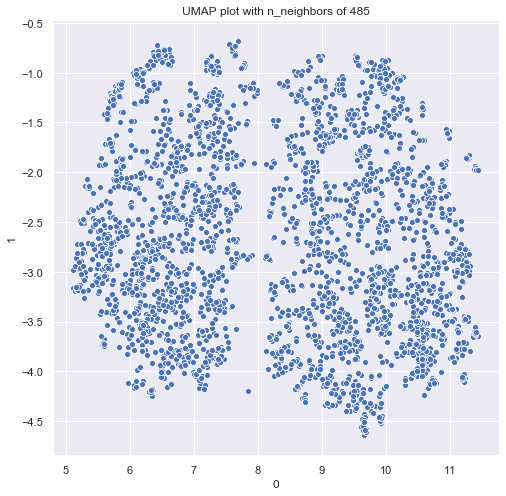

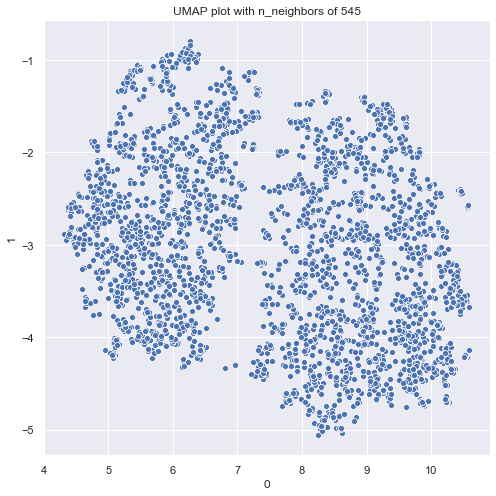

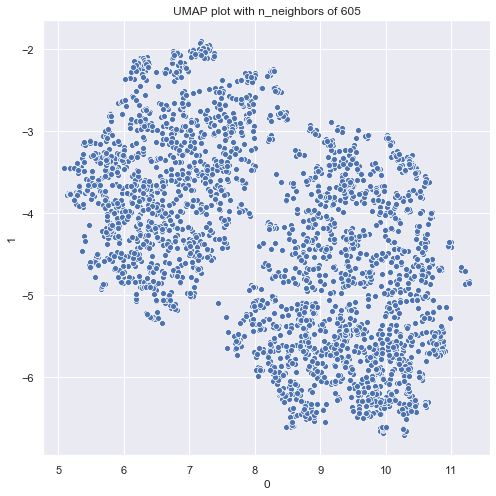

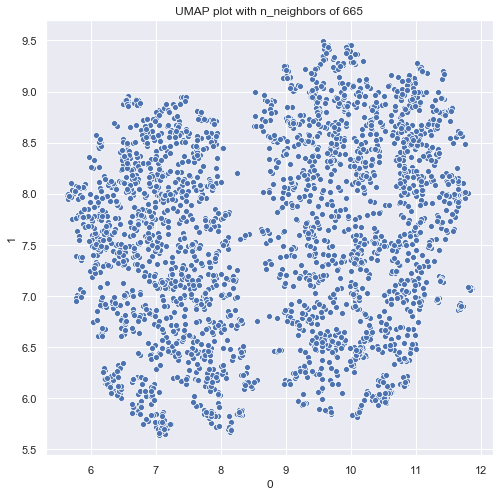

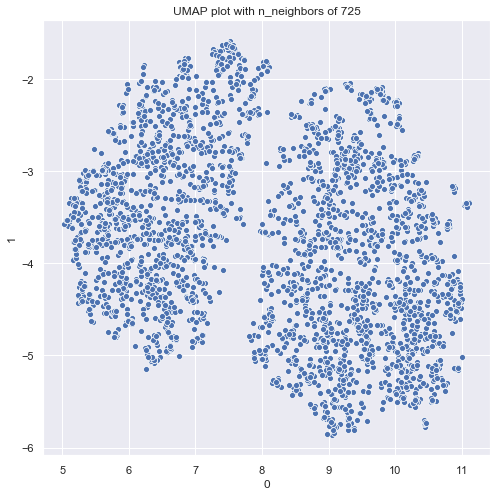

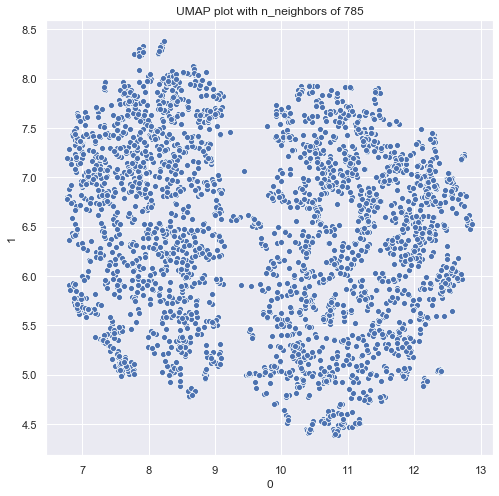

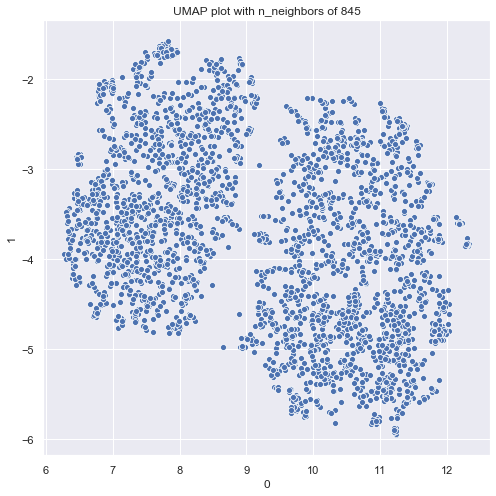

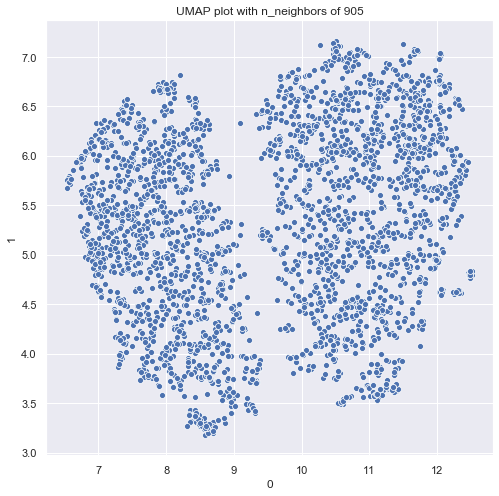

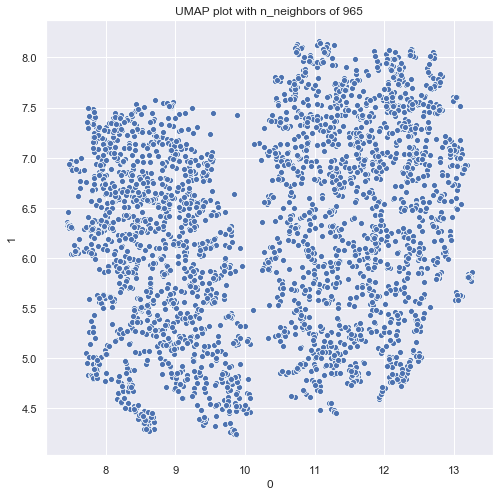

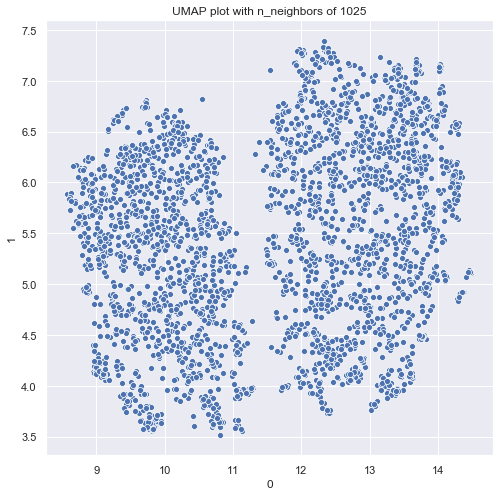

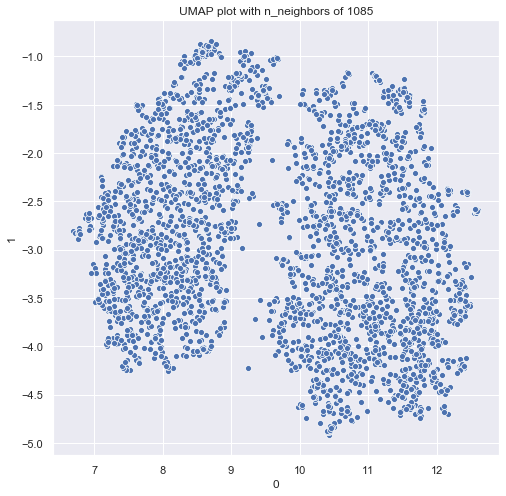

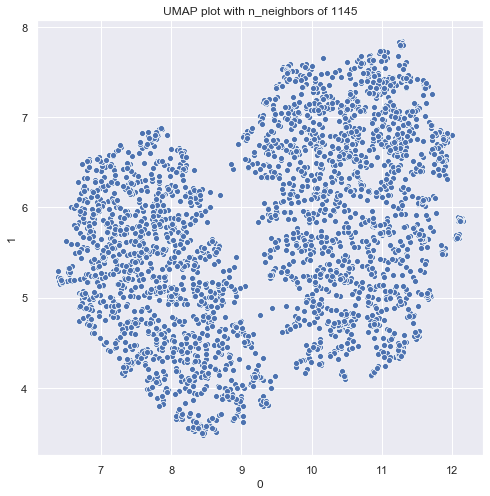

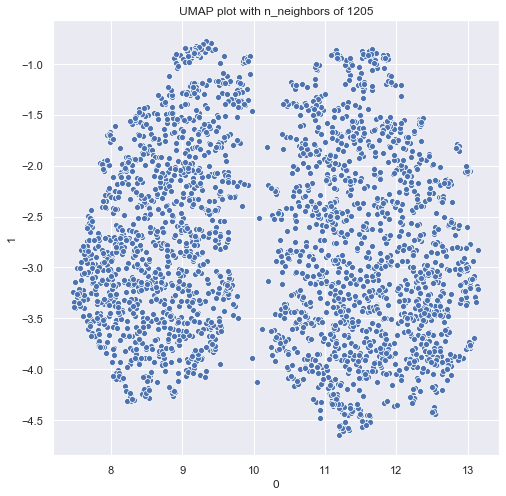

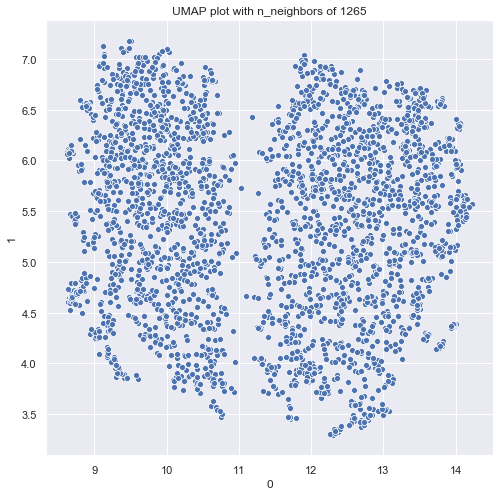

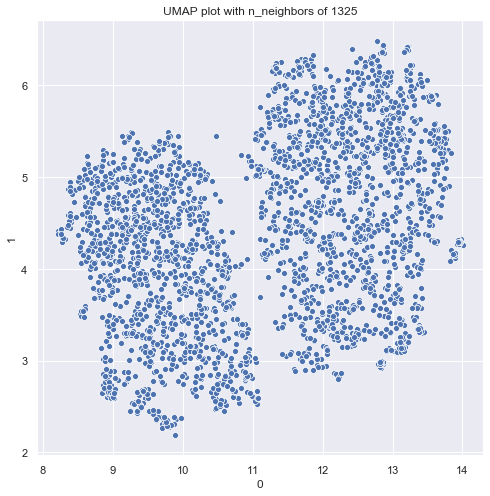

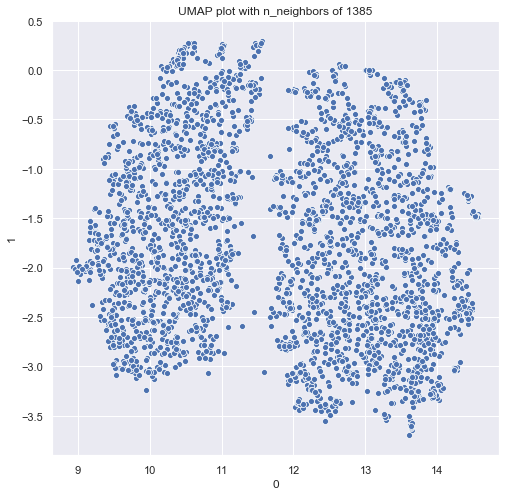

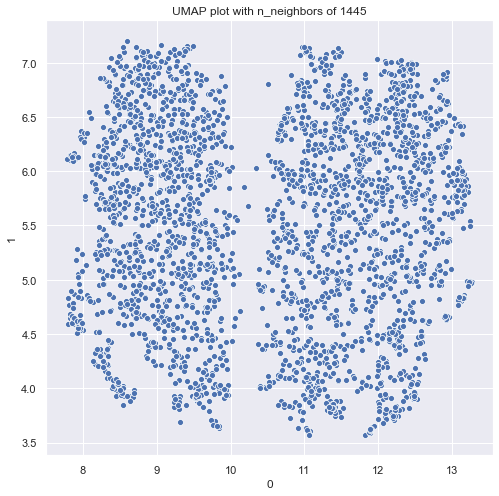

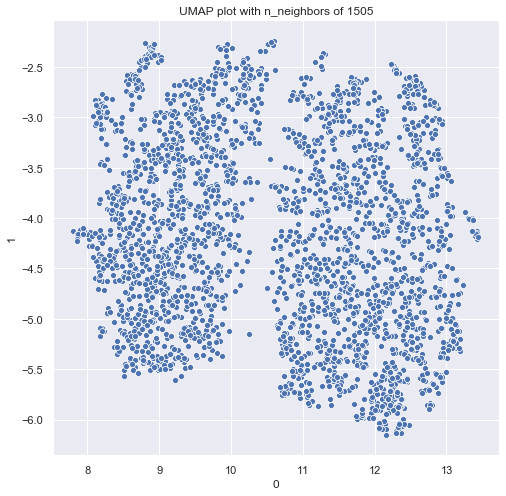

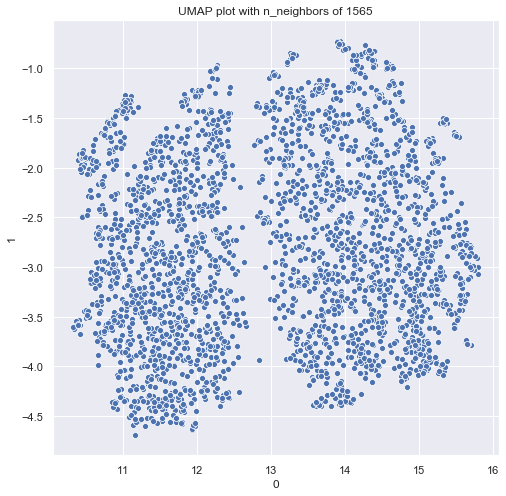

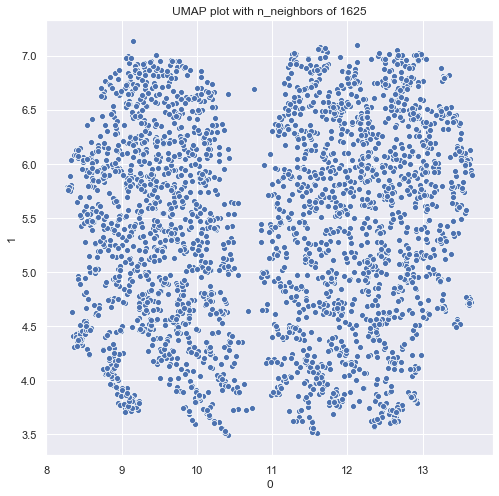

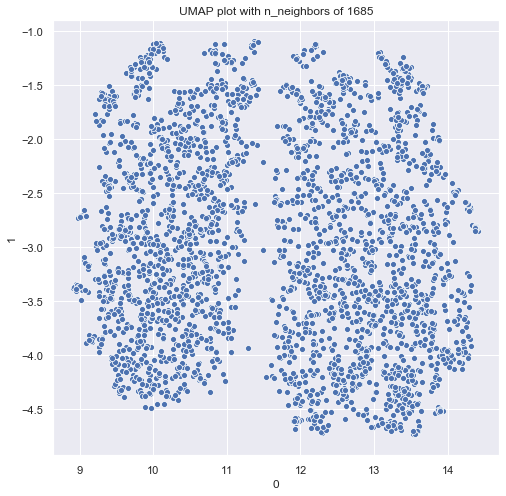

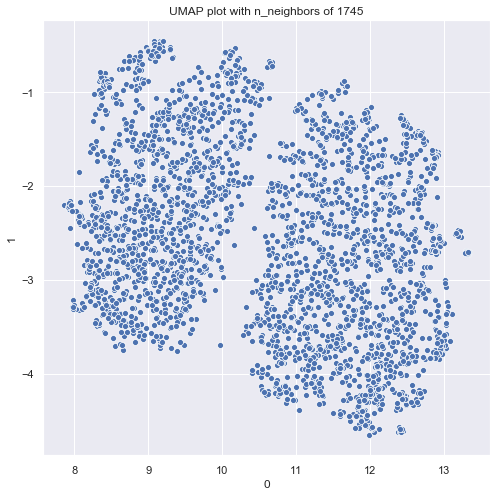

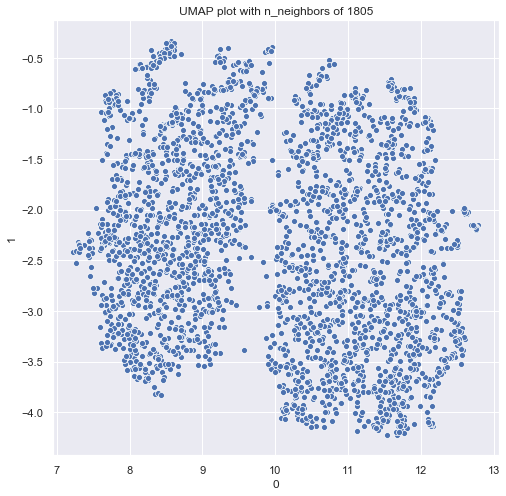

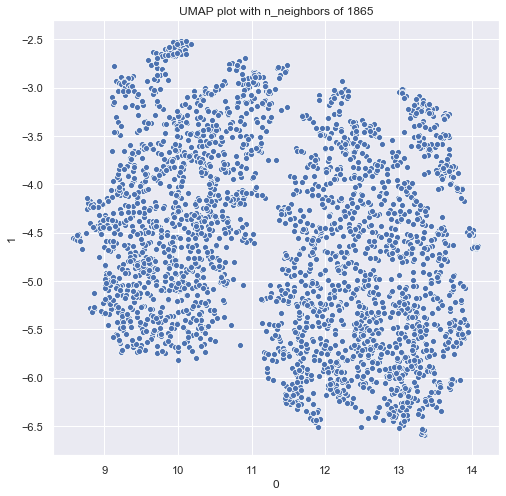

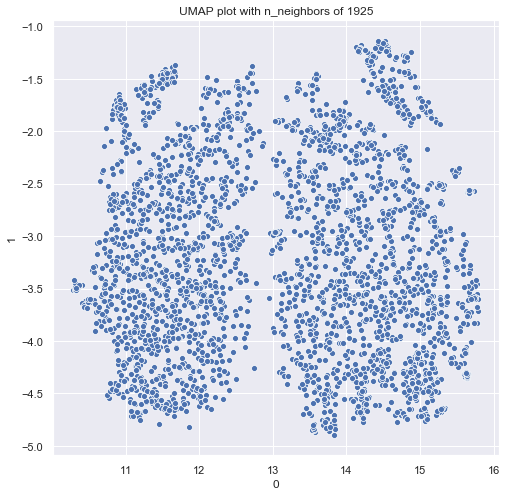

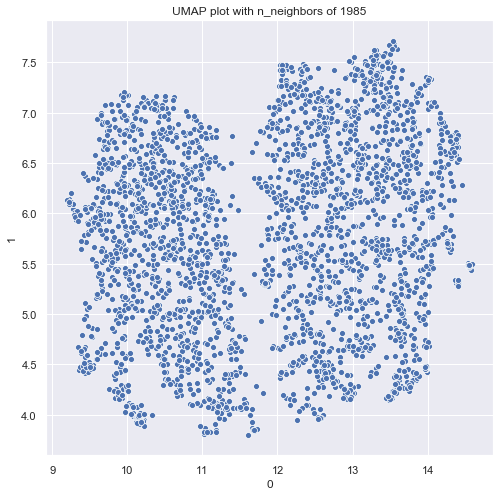

<IPython.core.display.Javascript object>

In [74]:
for n in range(5, 2000, 60):
    U = umap.UMAP(n_neighbors=n, min_dist=0, metric="precomputed")
    umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
    plt.title(f"UMAP plot with n_neighbors of {n}")
    plt.show()

In [ ]:
min_samples_list = range(2,10)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(dist_matrix)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))


In [ ]:
for i in [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(dist_matrix)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

In [ ]:
#MCA